In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/Raman/Documents/9111.csv")
df['Reason'] = df.title.apply(lambda title: title.split(':')[0])
df['title'] = df.title.apply(lambda title: title.split(':')[1])

In [3]:
print(df.head(10))
print(df['title'].apply(lambda x: len(x.split(' '))).sum())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   
5  40.253473 -75.283245  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   
6  40.182111 -75.127795  LAUREL AVE & OAKDALE AVE;  HORSHAM; Station 35...   
7  40.217286 -75.405182  COLLEGEVILLE RD & LYWISKI RD;  SKIPPACK; Stati...   
8  40.289027 -75.399590  MAIN ST & OLD SUMNEYTOWN PIKE;  LOWER SALFORD;...   
9  40.102398 -75.291458  BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD; PLYM...   

       zip                   title            timeStamp                twp  \
0  19525.0       BACK PAINS/INJURY  2015-12-10 17:10:52        

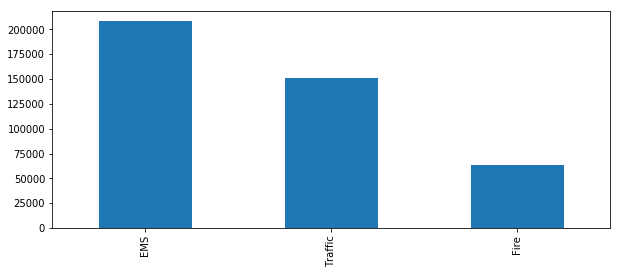

In [4]:
my_tags = ['EMS','Traffic','Fire']
plt.figure(figsize=(10,4))
df.Reason.value_counts().plot(kind='bar');


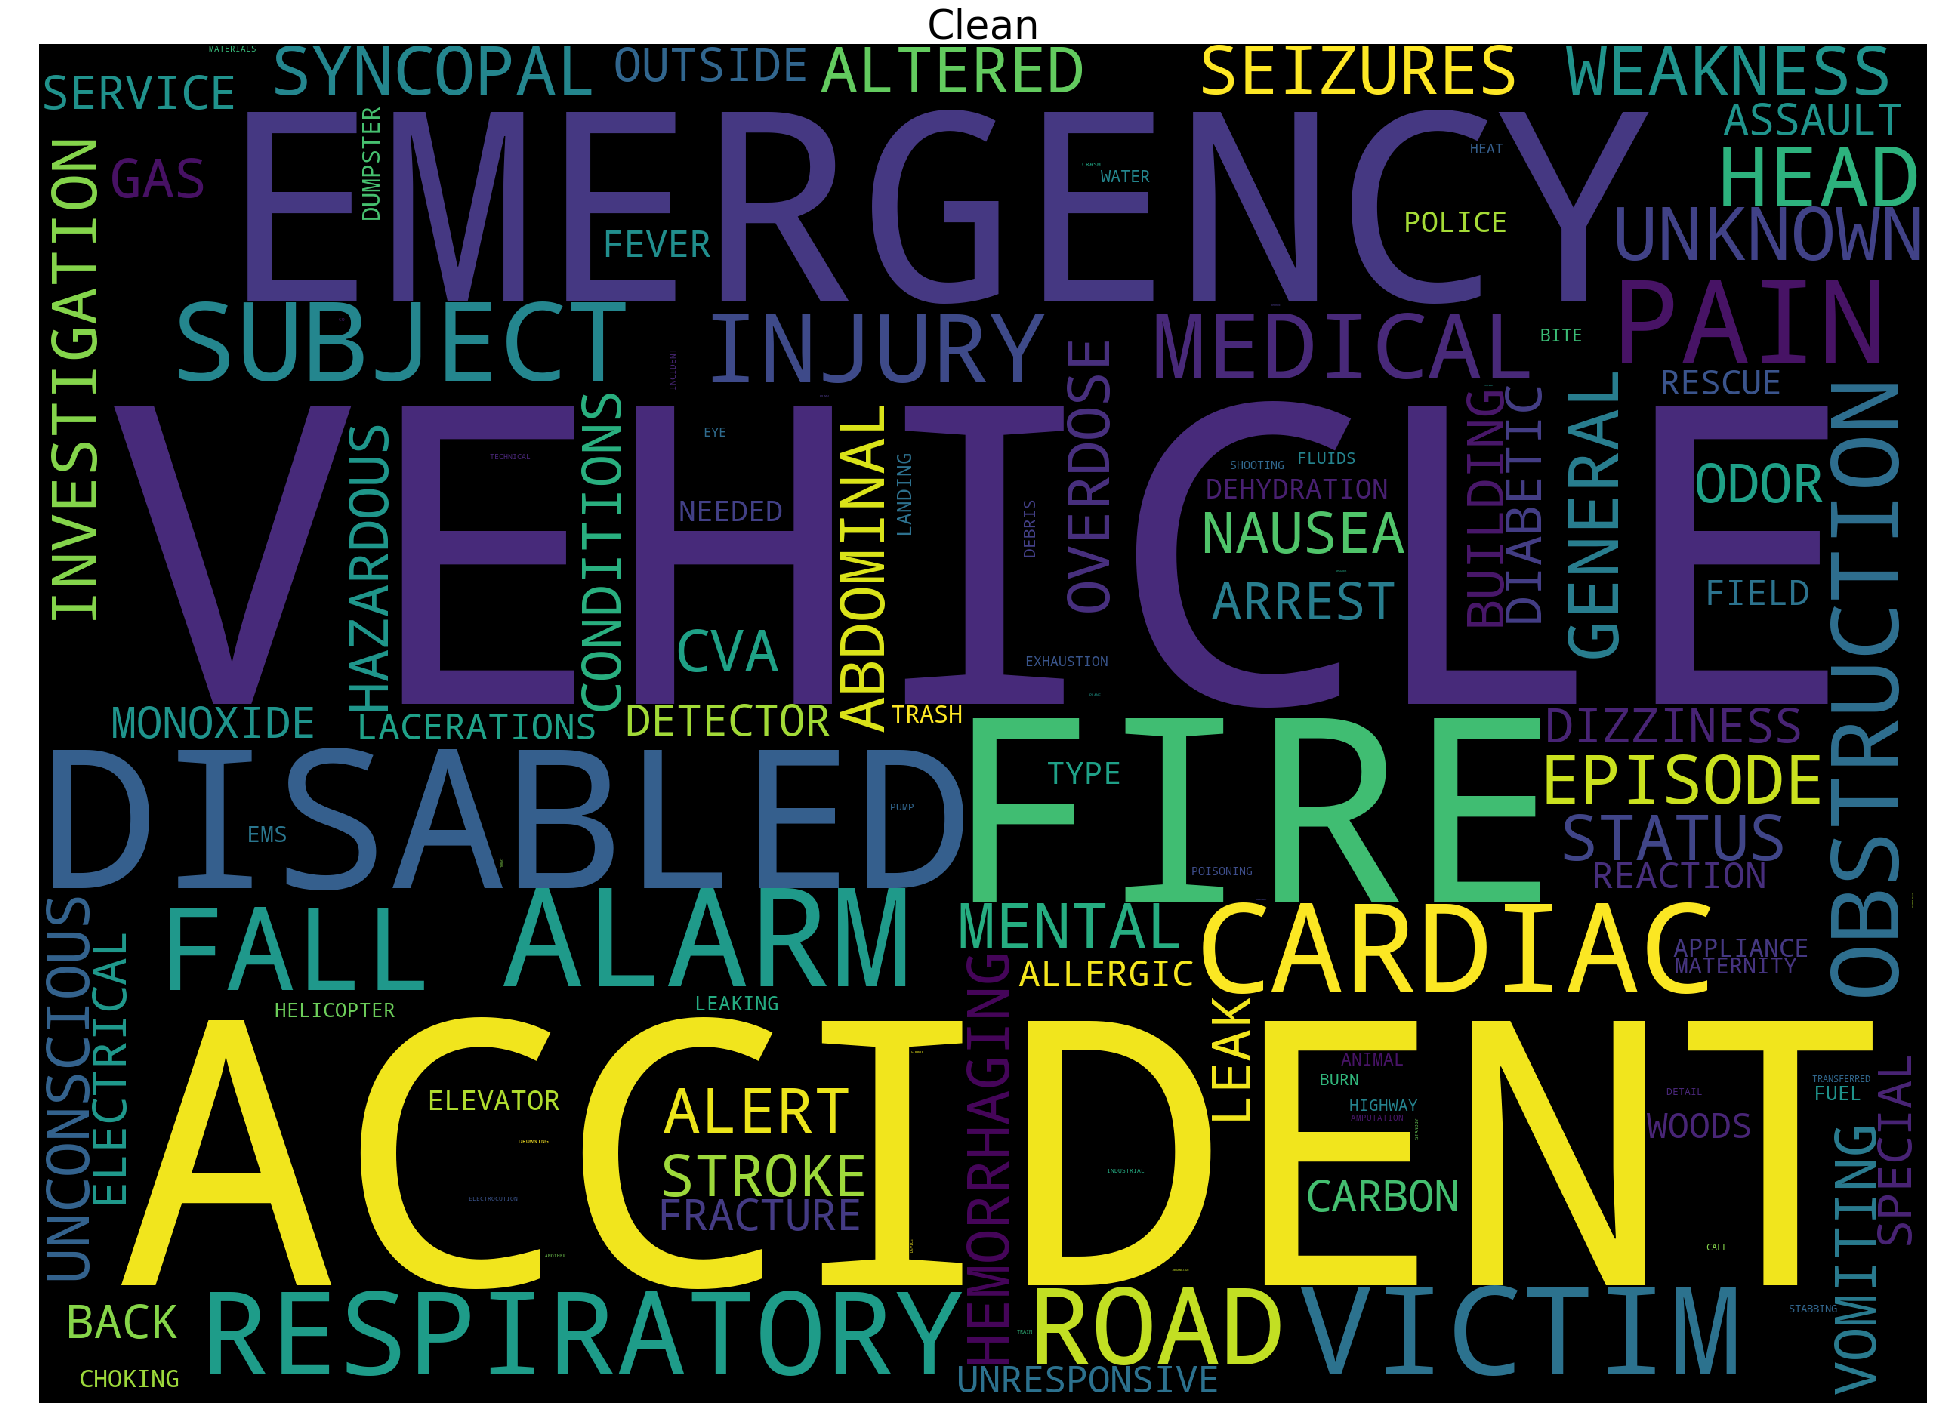

In [5]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean
#subset = df[df.clean==True]
text = df.title.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)
print(cloud_toxic)
#print(df['title'])

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = df
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['title'] = data['title'].str.lower()
data['title'] = data['title'].apply(cleanHtml)
data['title'] = data['title'].apply(cleanPunc)
data['title'] = data['title'].apply(keepAlpha)
#print(data['title'])

In [7]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
data['title'] = data['title'].apply(removeStopWords)
#print(data['title'])

In [8]:
X = data.title
y = df.Reason
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [9]:
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
#print(nb.predict(vectorizer.transform(data)))
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9295212034000928
              precision    recall  f1-score   support

         EMS       0.99      0.91      0.95     62620
     Traffic       0.92      0.87      0.89     19174
        Fire       0.86      0.98      0.92     45379

   micro avg       0.93      0.93      0.93    127173
   macro avg       0.93      0.92      0.92    127173
weighted avg       0.94      0.93      0.93    127173



In [10]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9287663261855897
              precision    recall  f1-score   support

         EMS       0.99      0.91      0.95     62620
     Traffic       0.93      0.86      0.89     19174
        Fire       0.86      0.98      0.92     45379

   micro avg       0.93      0.93      0.93    127173
   macro avg       0.93      0.92      0.92    127173
weighted avg       0.93      0.93      0.93    127173



In [11]:

from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)



y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9298671887900734
              precision    recall  f1-score   support

         EMS       0.99      0.91      0.95     62620
     Traffic       0.96      0.84      0.89     19174
        Fire       0.85      1.00      0.92     45379

   micro avg       0.93      0.93      0.93    127173
   macro avg       0.93      0.91      0.92    127173
weighted avg       0.94      0.93      0.93    127173



In [12]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', svm.SVC()),
               ])
logreg.fit(X_train, y_train)



y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9298042823555315
              precision    recall  f1-score   support

         EMS       0.99      0.91      0.95     62620
     Traffic       0.96      0.83      0.89     19174
        Fire       0.85      1.00      0.92     45379

   micro avg       0.93      0.93      0.93    127173
   macro avg       0.94      0.91      0.92    127173
weighted avg       0.94      0.93      0.93    127173



In [12]:
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("C:/Users/Raman/Documents/GoogleNews-vectors-negative300-SLIM.bin", binary=True)
wv.init_sims(replace=True)

In [13]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [14]:

def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['title']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['title']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['Reason'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.Reason))
print(classification_report(test.Reason, y_pred,target_names=my_tags))

accuracy 0.9298671887900734
              precision    recall  f1-score   support

         EMS       0.99      0.91      0.95     62620
     Traffic       0.96      0.84      0.89     19174
        Fire       0.85      1.00      0.92     45379

   micro avg       0.93      0.93      0.93    127173
   macro avg       0.93      0.91      0.92    127173
weighted avg       0.94      0.93      0.93    127173



In [5]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
df=pd.read_csv("C:/Users/Raman/Documents/9111.csv")
df['Reason'] = df.title.apply(lambda title: title.split(': ')[0])
df['title'] = df.title.apply(lambda title: title.split(': ')[1])
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = df
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['title'] = data['title'].str.lower()
data['title'] = data['title'].apply(cleanHtml)
data['title'] = data['title'].apply(cleanPunc)
data['title'] = data['title'].apply(keepAlpha)
train_size = int(len(df) * .7)
train_posts = data['title'][:train_size]
train_tags = df['Reason'][:train_size]

test_posts = data['title'][train_size:]
test_tags = df['Reason'][train_size:]

max_words = 100
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32
epochs = 7

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 267062 samples, validate on 29674 samples
Epoch 1/7
267062/267062 [==============================] - 39s 145us/step - loss: 0.2220 - acc: 0.9272 - val_loss: 0.2086 - val_acc: 0.9323
Epoch 2/7
267062/267062 [==============================] - 34s 126us/step - loss: 0.2160 - acc: 0.9278 - val_loss: 0.2092 - val_acc: 0.9322
Epoch 3/7
267062/267062 [==============================] - 32s 121us/step - loss: 0.2159 - acc: 0.9277 - val_loss: 0.2099 - val_acc: 0.9323
Epoch 4/7
267062/267062 [==============================] - 34s 126us/step - loss: 0.2155 - acc: 0.9279 - val_loss: 0.2087 - val_acc: 0.93231s - lo
Epoch 5/7
267062/267062 [==============================] - 34s 127us/step - loss: 0.2154 - acc: 0.9279 - val_loss: 0.2100 - val_acc: 0.9321
Epoch 6/7
267062/267062 [==============================] - 37s 139us/step - loss: 0.2155 - acc: 0.9277 - val_loss: 0.2098 - val_acc: 0.9321
Epoch 7/7
267062/267062 [==============================] - 39s 145us/step - loss: 0.2154 - acc: 0.9278

In [6]:
score = model.evaluate(x_test, y_test,batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

127173/127173 [==============================] - 5s 42us/step
Test accuracy: 0.9280743554056285


In [4]:
print(model.summary)

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x0000021AB23952B0>>
